Ссылка на датасет: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS

f = open('/content/household_power_consumption.txt')
d = []
f.readline()
for i in range(1000):
  s = f.readline()
  if '?' not in s:
    d.append([float(x) for x in s.split(";")[2:]])
d = np.array(d)


In [ ]:
d.shape

(1000, 7)

Text(0.5, 1.0, 't-SNE визуализация')

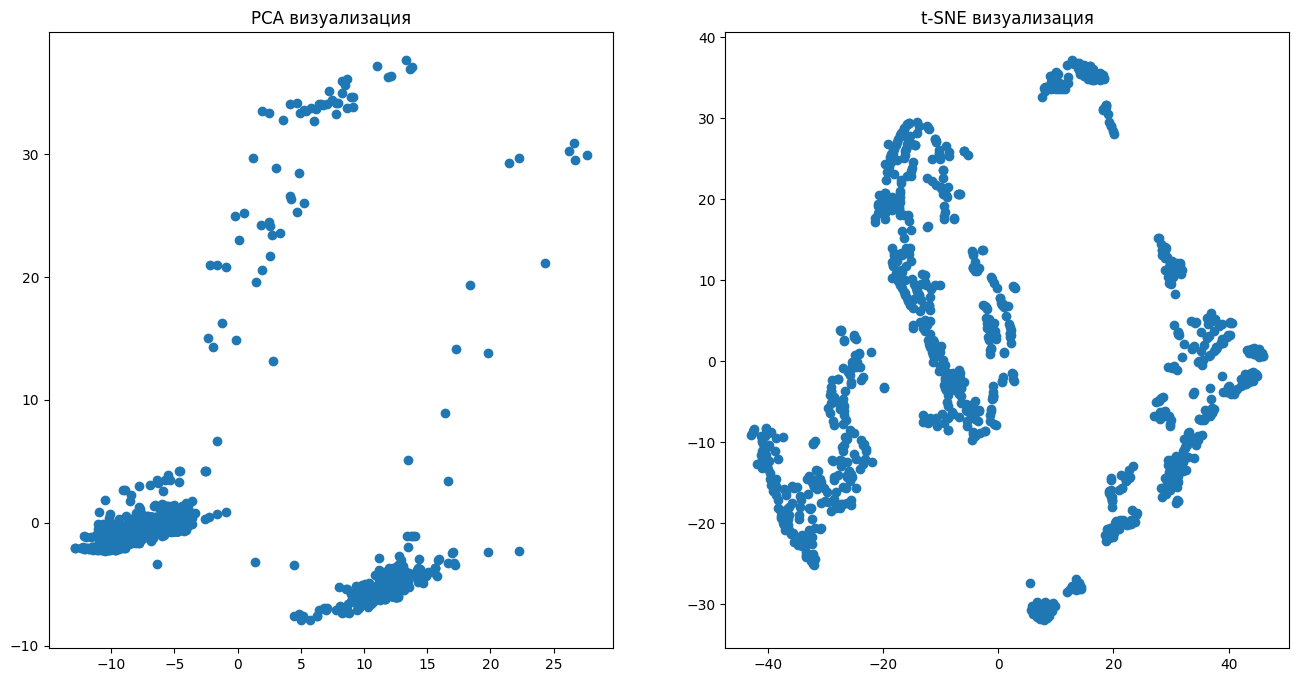

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
tsne = TSNE(n_components=2, random_state=42)
d_pca = pca.fit_transform(d)
d_tsne = tsne.fit_transform(d)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].scatter(d_pca[:, 0], d_pca[:, 1])
axs[0].set_title('PCA визуализация')

axs[1].scatter(d_tsne[:, 0], d_tsne[:, 1])
axs[1].set_title('t-SNE визуализация')


Подбор оптимальных параметров для методов

In [ ]:
from sklearn.metrics import silhouette_score

methods_result = {}

#DBSCAN
dbscan_best_score = -1
dbscan_best_clf = None
for e in np.arange(0.1, 5, 0.01):
  clf = DBSCAN(eps=e).fit_predict(d_tsne)
  unique_labels = set(clf)
  n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
  if n_clusters >= 2:
    score = silhouette_score(d_tsne, clf)
    print(f"DBSCAN current score: {score}")
    if score > dbscan_best_score:
      dbscan_best_score = score
      dbscan_best_clf = clf
methods_result['DBSCAN'] = [dbscan_best_score, dbscan_best_5clf]

#KMEANS
kmeans_best_score = -1
kmeans_best_clf = None
for k in range(2, 10):
  clf = KMeans(n_clusters=k).fit_predict(d_tsne)
  score = silhouette_score(d_tsne, clf)
  print(f"KMeans current score: {score}")
  if score > kmeans_best_score:
    kmeans_best_score = score
    kmeans_best_clf = clf
methods_result['KMeans'] = [kmeans_best_score, kmeans_best_clf]

#AgglomerativeClustering
ac_best_score = -1
ac_best_clf = None
for k in range(2, 10):
  clf = AgglomerativeClustering(n_clusters=k).fit_predict(d_tsne)
  score = silhouette_score(d_tsne, clf)
  print(f"AggClustering current score: {score}")
  if score > ac_best_score:
    ac_best_score = score
    ac_best_clf = clf
methods_result['AgglomerativeClustering'] = [ac_best_score, ac_best_clf]

#OPTICS
o_best_score = -1
o_best_clf = None
for n in range(2, 10):
  clf = OPTICS(min_samples=n).fit_predict(d_tsne)
  unique_labels = set(clf)
  n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
  if n_clusters >= 2:
    score = silhouette_score(d_tsne, clf)
    print(f"OPTICS current score: {score}")
    if score > o_best_score:
      o_best_score = score
      o_best_clf = clf
methods_result['OPTICS'] = [o_best_score, o_best_clf]

best_method = None
best_score = -1
for k, v in methods_result.items():
  if v[0] > best_score:
    best_score = v[0]
    best_method = k
print(f"Best method: {best_method}. Silhouette_score: {best_score}")

DBSCAN current score: -0.39173442125320435
DBSCAN current score: -0.39173442125320435
DBSCAN current score: -0.39173442125320435
DBSCAN current score: -0.4431105852127075
DBSCAN current score: -0.4410177171230316
DBSCAN current score: -0.48039349913597107
DBSCAN current score: -0.4757671654224396
DBSCAN current score: -0.4757671654224396
DBSCAN current score: -0.4815748333930969
DBSCAN current score: -0.5666928887367249
DBSCAN current score: -0.5566235184669495
DBSCAN current score: -0.5566235184669495
DBSCAN current score: -0.5586963295936584
DBSCAN current score: -0.5567165613174438
DBSCAN current score: -0.6750532388687134
DBSCAN current score: -0.655177116394043
DBSCAN current score: -0.6460233330726624
DBSCAN current score: -0.6113430857658386
DBSCAN current score: -0.6078013181686401
DBSCAN current score: -0.5922197103500366
DBSCAN current score: -0.6090195178985596
DBSCAN current score: -0.5705613493919373
DBSCAN current score: -0.5544253587722778
DBSCAN current score: -0.537061

Наилучший результат по метрике silhouette_score показал метод KMeans

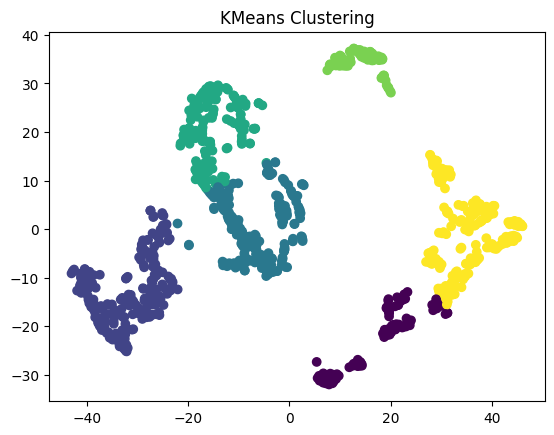

In [ ]:
#Визуализация результатов кластеризации KMeans
plt.title("KMeans Clustering")
plt.scatter(d_tsne[:, 0], d_tsne[:, 1], c=methods_result['KMeans'][1])

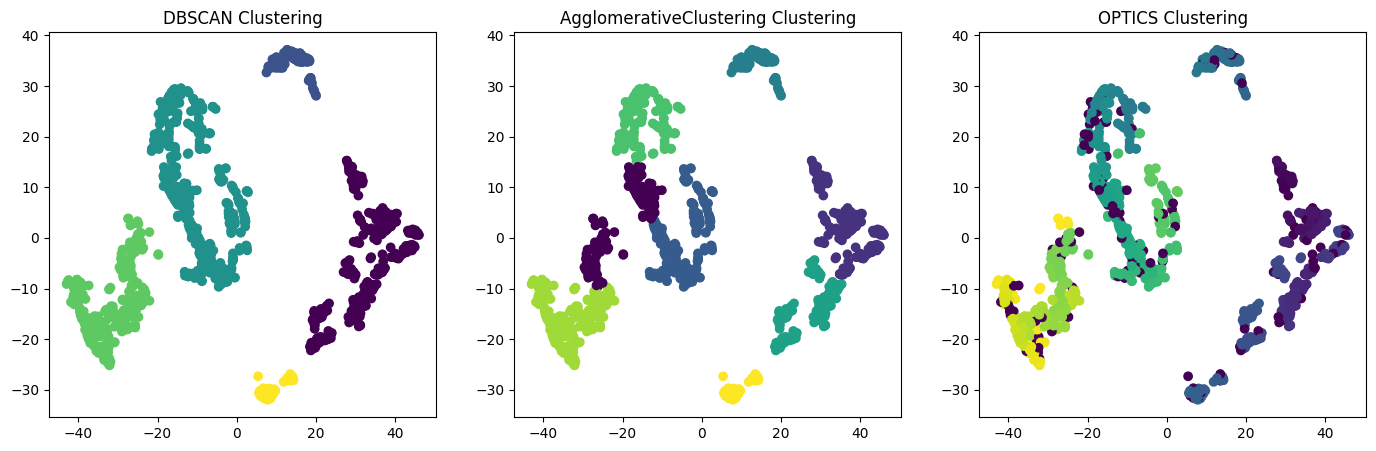

In [ ]:
#Визуализация результатов кластеризации остальных методов
fig, axs = plt.subplots(1, 3, figsize = (17, 5))
axs[0].set_title("DBSCAN Clustering")
axs[0].scatter(d_tsne[:, 0], d_tsne[:, 1], c=methods_result['DBSCAN'][1])
axs[1].set_title("AgglomerativeClustering Clustering")
axs[1].scatter(d_tsne[:, 0], d_tsne[:, 1], c=methods_result['AgglomerativeClustering'][1])
axs[2].set_title("OPTICS Clustering")
axs[2].scatter(d_tsne[:, 0], d_tsne[:, 1], c=methods_result['OPTICS'][1])